In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
part1=pd.read_csv('part1.csv')
# part1.insert(10,"Cluster",5)
part1.head()

In [ ]:
part1.shape[0]

In [ ]:
part2,part3,part4=pd.read_csv('part2.csv'),pd.read_csv('part3.csv'),pd.read_csv('part4.csv')
# part2.insert(10,"Cluster",2)
# part3.insert(10,"Cluster",9)
# part4.insert(10,"Cluster",7)


In [ ]:
part5,part6=pd.read_csv('part5.csv'),pd.read_csv('part6.csv')
part7,part8=pd.read_csv('part7.csv'),pd.read_csv('part8.csv')
part9,part10=pd.read_csv('part9.csv'),pd.read_csv('part10.csv')
part11=pd.read_csv('part11.csv')
# part5.insert(10,"Cluster",0)
# part6.insert(10,"Cluster",4)
# part7.insert(10,"Cluster",8)
# part8.insert(10,"Cluster",3)
# part9.insert(10,"Cluster",6)
# part10.insert(10,"Cluster",10)
# part11.insert(10,"Cluster",1)

In [ ]:
part1f,part2f,part3f,part4f,part5f=part1.iloc[:5000,:],part2.iloc[:5000,:],part3.iloc[:5000,:],part4.iloc[:5000,:],part5.iloc[:5000,:]
part6f,part7f,part8f,part9f,part10f=part6.iloc[:5000,:],part7.iloc[:5000,:],part8.iloc[:5000,:],part9.iloc[:5000,:],part10.iloc[:5000,:]
part11f=part11.iloc[:5000,:]
# frames=[part1f,part2f,part3f,part4f,part5f,part6f,part7f,part8f,part9f,part10f,part11f]
frames=[part1,part2,part3,part4,part5,part6,part7,part8,part9,part10,part11]

dataframe=pd.concat(frames)
# dataframe.to_csv('fulldataset.csv')

In [2]:
df=pd.read_csv('fulldataset.csv')
df=df.iloc[:,2:]
df.head()



,Input_Delta_Current,Input_Delta_Voltage,Input_Original_Current_Pre_1C,Input_Original_Current_Pre_VarC,Input_Original_Voltage_Pre_1C,Input_Original_Voltage_Pre_VarC,Target_Delta_Charge_Capacity,Target_Delta_Discharge_Capacity,Time
0,0.0,-0.100338,0.0,0.0,3.347792,3.247454,0.0,0.0,0.000000
1,0.0,-0.099988,0.0,0.0,3.347601,3.247613,0.0,0.0,0.000028
2,0.0,-0.100119,0.0,0.0,3.347696,3.247577,0.0,0.0,0.000056
3,0.0,-0.100179,0.0,0.0,3.347887,3.247708,0.0,0.0,0.000083
4,0.0,-0.099988,0.0,0.0,3.347649,3.247660,0.0,0.0,0.000111


In [9]:
df=StandardScaler().fit_transform(df)
pca=PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.explained_variance_ratio_

array([0.3122882 , 0.25142109, 0.19369633, 0.10548764, 0.07687683,
       0.03013307, 0.02311328, 0.00546074, 0.00152281])

In [11]:
score_df=pca.transform(df)

Text(0,0.5,'Variance')

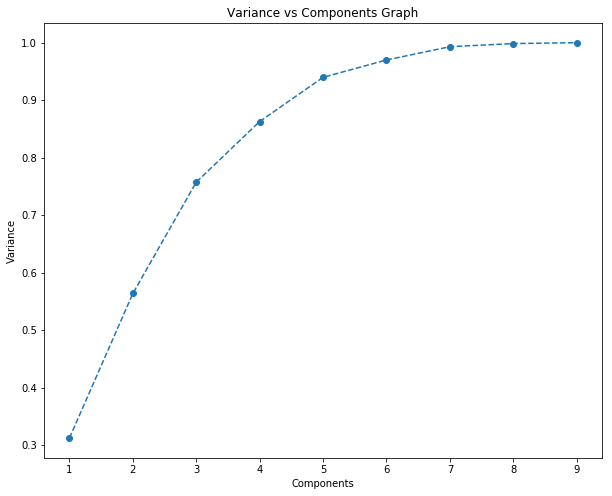

In [5]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Variance vs Components Graph')
plt.xlabel('Components')
plt.ylabel('Variance')

In [6]:
pca=PCA(n_components=2)
new_df=pca.fit_transform(df)

In [8]:
pca.explained_variance_ratio_

array([0.3122882 , 0.25142109])

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,21):
    kmeans_p=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans_p.fit(score_df)
    wcss.append(kmeans_p.inertia_)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.title('K-means with PCA clustering Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(n_clusters=11)
df=dataframe.iloc[:,:-1]

y = kmeans.fit_predict(df[['Input_Delta_Current', 'Input_Delta_Voltage', 'Input_Original_Current_Pre_1C', 'Input_Original_Current_Pre_VarC','Input_Original_Voltage_Pre_1C','Input_Original_Voltage_Pre_VarC','Target_Delta_Charge_Capacity','Target_Delta_Discharge_Capacity','Time']])

df['Cluster'] = y
cluster=dataframe.iloc[:,-1:]
df.head()

In [ ]:
df.shape

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error


In [ ]:
cluster_predict.head()

In [ ]:

results=pd.read_csv('result1.csv')
cluster_predict=results.iloc[:,-1:]
cluster=dataframe.iloc[:,-1:]
#Creating the consufion matrix of predicted values and actual test set values 
cm=confusion_matrix(cluster,cluster_predict)
print("Accuracy Score--",accuracy_score(cluster,cluster_predict))
print(cm)


In [ ]:
dataframe_x=dataframe.iloc[:,np.r_[:7,-1]]
dataframe_y1=dataframe.iloc[:,7]
dataframe_y2=dataframe.iloc[:,8]
dataframe_y2.head()

In [ ]:
#Apply SelectKBest and ch2 statistical testing to extract 8 best features in the training dataset
fs = SelectKBest(score_func=f_regression, k=8)
# bestfeatures = SelectKBest(score_func=chi2, k=8)
# fit=bestfeatures.fit(dataframe_x,dataframe_y1)
# dfscores = pd.DataFrame(fit.scores_)
X_selected = fs.fit_transform(dataframe_x, dataframe_y1)
# dfcolumns = pd.DataFrame(dataframe_x.columns)
X_selected.head()

In [ ]:
kmeans = KMeans(n_clusters=11)
y = kmeans.fit_predict(dataframe[['Input_Delta_Current', 'Input_Delta_Voltage', 'Input_Original_Current_Pre_VarC','Input_Original_Voltage_Pre_VarC','Target_Delta_Charge_Capacity','Target_Delta_Discharge_Capacity','Time']])
dataframe['Cluster'] = y
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
dataframe.head()
dataframe.to_csv('result1.csv')
print(current_time)

In [ ]:
# %install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
# %load_ext autotime

term=pd.read_csv('result1.csv')
term=term.iloc[:,-1:]
term.head()
di={}
for i in range(11):
#     di[str(i)]=df[(df['Cluster']==i)].count()
    print(term[(term['Cluster']==i)].count())

In [ ]:
dataframe.head()